In [1]:
import os
import matplotlib.pyplot as plt

import numpy as np
import advopt
from advopt.tasks import PythiaTracker

ROOT = os.path.dirname(os.path.dirname(advopt.__file__))
FIG_ROOT = os.path.join(ROOT, 'figures')

os.makedirs(FIG_ROOT, exist_ok=True)

/mnt/mborisyak/.pyenv/versions/3.7.6/envs/py3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/mnt/mborisyak/.pyenv/versions/3.7.6/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
task = PythiaTracker(n_jobs=None, seed=111)

In [3]:
offset = 0.25
X_ground_truth, _ = task.ground_truth_generator()(32 * 1024)
X_x, _ = task.generator(np.array([offset, 0.0, 0.0]))(32 * 1024)
X_y, _ = task.generator(np.array([0.0, offset, 0.0]))(32 * 1024)
X_z, _ = task.generator(np.array([0.0, 0.0, offset]))(32 * 1024)

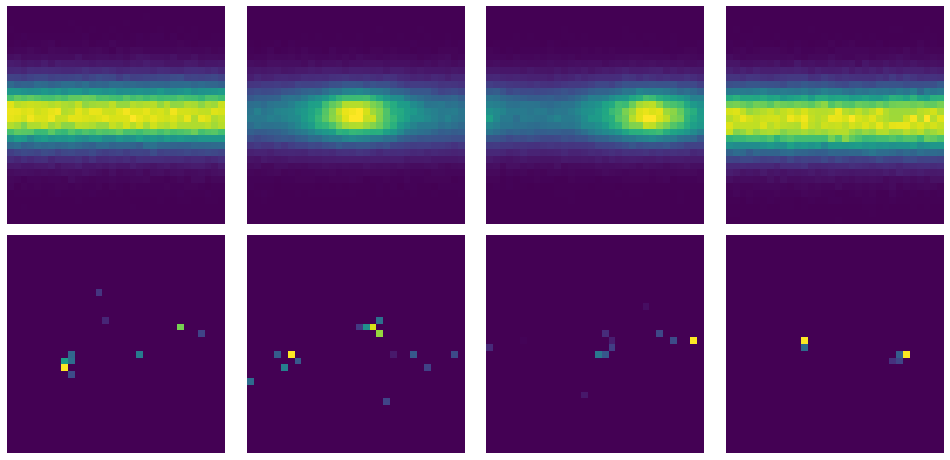

In [4]:
size = 3
space = 0.5
plt.subplots(nrows=2, ncols=4, figsize=(4 * size + 3 * space, 2 * size + space))

plt.subplot(2, 4, 1)
plt.axis('off')
plt.imshow(np.mean(X_ground_truth, axis=(0, 1)))

plt.subplot(2, 4, 2)
plt.axis('off')
plt.imshow(np.mean(X_x, axis=(0, 1)))

plt.subplot(2, 4, 3)
plt.axis('off')
plt.imshow(np.mean(X_y, axis=(0, 1)))

plt.subplot(2, 4, 4)
plt.axis('off')
plt.imshow(np.mean(X_z, axis=(0, 1)))

plt.subplot(2, 4, 5)
plt.axis('off')
plt.imshow(X_ground_truth[0, 0])

plt.subplot(2, 4, 6)
plt.axis('off')
plt.imshow(X_x[0, 0])

plt.subplot(2, 4, 7)
plt.axis('off')
plt.imshow(X_y[0, 0])

plt.subplot(2, 4, 8)
plt.axis('off')
plt.imshow(X_z[0, 0])

plt.tight_layout()
plt.savefig(os.path.join(FIG_ROOT, 'Figure-4.pdf'))